In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 

In [4]:
%%time
train = pd.read_parquet('data_fusion_train.parquet')

Wall time: 17.2 s


In [5]:
train = train[train.category_id != -1].drop_duplicates('item_name')

In [6]:
train.shape

(48225, 9)

In [8]:
train.dtypes

receipt_id             int64
receipt_dayofweek      int32
receipt_time          object
item_name             object
item_quantity        float64
item_price             int64
item_nds_rate          int32
category_id            int64
brands                object
dtype: object

In [10]:
train.head(10)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
1,11,6,20:34,"Молоко 3,2%,шт",2.0,8,2,78,None
3,39,4,11:28,"Компот из изюма, 114 ккал",1.0,4,1,71,None
4,39,4,11:28,"Макаронные изделия отварные (масло сливочное),...",1.0,4,1,71,None
17,56,5,11:42,Кофе Капучино Большой Эден 18,1.0,12,1,70,None
40,105,3,01:53,Хлеб на СЫВОРОТКЕ 350г,1.0,7,-1,84,None
53,122,0,11:46,Сосиска в тесте с сыром 1шт ГЕ,3.0,7,2,84,None
58,129,3,15:17,ЛанчБаскет 5 за 300: 2 шт ОРИГ Стрипсы кур фил,1.0,8,2,69,None
62,129,3,15:17,Станд Картофель фри,2.0,8,6,69,None
63,129,3,15:17,Хот-дог Куриный СБ,1.0,9,2,69,None
64,129,3,15:17,Чизбургер с луком СБ,1.0,9,2,68,None


In [12]:
train.category_id.nunique()

96

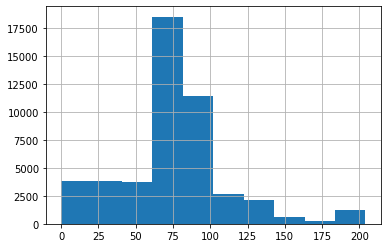

In [13]:
train.category_id.hist()

In [16]:
train.brands.nunique()

2504

In [18]:
train.brands.unique()

array([None, 'zewa', 'кока-кола', ..., 'леди джем', 'puff', 'тот'],
      dtype=object)

In [40]:
len(train[ train.brands != None])

48225

In [19]:
train.item_nds_rate.nunique()

7

In [20]:
train.item_nds_rate.unique()

array([ 2,  1, -1,  6,  5,  4,  3])

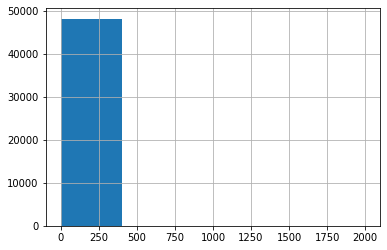

In [23]:
train.item_quantity.hist(bins=5)

In [25]:
train.item_quantity.nunique()

2071

In [31]:
train.item_quantity.describe()

count    48225.000000
mean         1.957514
std         17.629286
min          0.005000
25%          1.000000
50%          1.000000
75%          1.000000
max       2000.000000
Name: item_quantity, dtype: float64

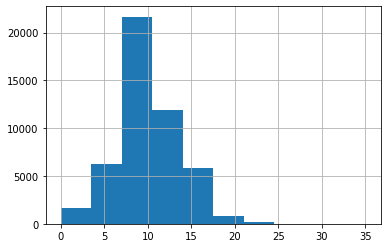

In [27]:
train.item_price.hist()

In [30]:
train.item_price.describe()

count    48225.000000
mean         9.681472
std          3.576853
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         35.000000
Name: item_price, dtype: float64

In [33]:
train.receipt_dayofweek.describe()

count    48225.000000
mean         3.058580
std          1.979068
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: receipt_dayofweek, dtype: float64

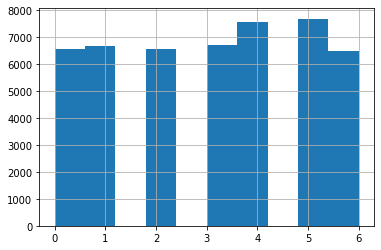

In [34]:
train.receipt_dayofweek.hist()

In [4]:
stop = stopwords.words('russian')
tfidf = TfidfVectorizer(stop_words=stop, max_features=1000)
X_train = tfidf.fit_transform(train.item_name)

In [5]:
clf = LogisticRegression(max_iter=400)
cross_val_score(clf, X_train, train.category_id, cv=3, scoring='f1_weighted')

array([0.64342123, 0.62681385, 0.5955667 ])

In [6]:
clf.fit(X_train, train.category_id)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
import pickle
pickle.dump(tfidf, open('tfidf', 'wb'))
pickle.dump(clf, open('clf_task1', 'wb'))